In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')

In [4]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [5]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [7]:
# There are no null values present in dataset
# There are 8 numeric features and 10 categorical feature 
# As id column is not needed we drop it first 
# As our target variable is categorical we need to build a classification model

In [8]:
df=df.drop(columns = 'ID')

In [9]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,31647.0,40.957247,10.625134,18.0,33.0,39.0,48.0,95.0
balance,31647.0,1363.890258,3028.304293,-8019.0,73.0,450.0,1431.0,102127.0
day,31647.0,15.835466,8.337097,1.0,8.0,16.0,21.0,31.0
duration,31647.0,258.113534,257.118973,0.0,104.0,180.0,318.5,4918.0
campaign,31647.0,2.765697,3.113830,1.0,1.0,2.0,3.0,63.0
pdays,31647.0,39.576042,99.317592,-1.0,-1.0,-1.0,-1.0,871.0
previous,31647.0,0.574272,2.422529,0.0,0.0,0.0,0.0,275.0


In [11]:
# In age max value is much higher than 75 % value which means there are outliers present 
#lets seperate categorical and numerical columns 

In [12]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], object: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']}

In [13]:
df.duplicated().sum() # no duplicate data is present 

0

In [14]:
# let's visualize the data 

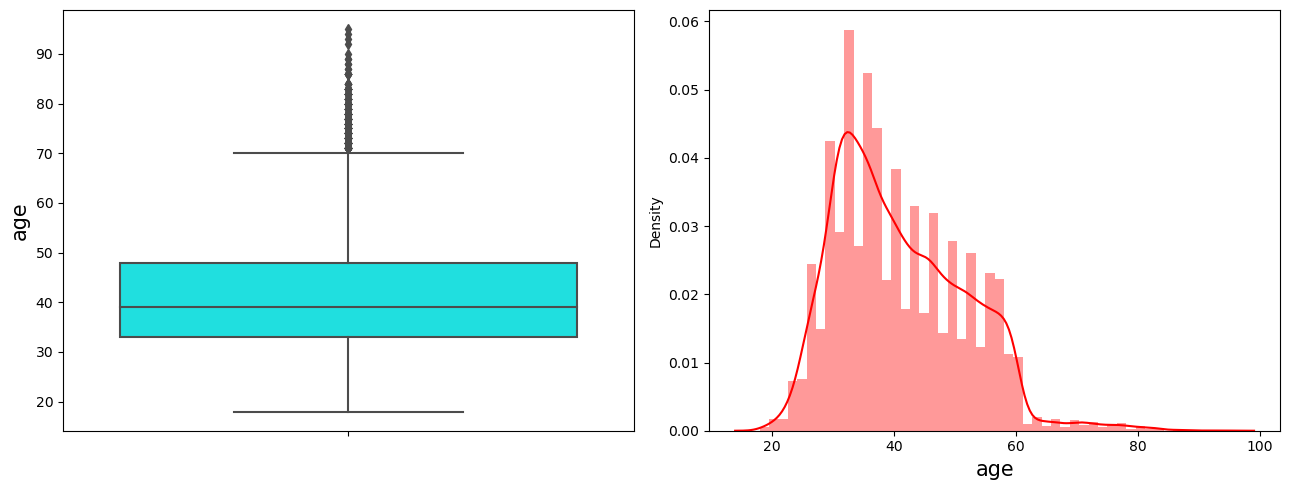

In [15]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(y='age', data=df,color='cyan')
plt.ylabel('age',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['age'], color='r')
plt.xlabel('age',fontsize=15)
plt.tight_layout()
plt.show()

In [16]:
# As we can clearly see that there are outliers in data 
# and also the distribution is skewed towards right 

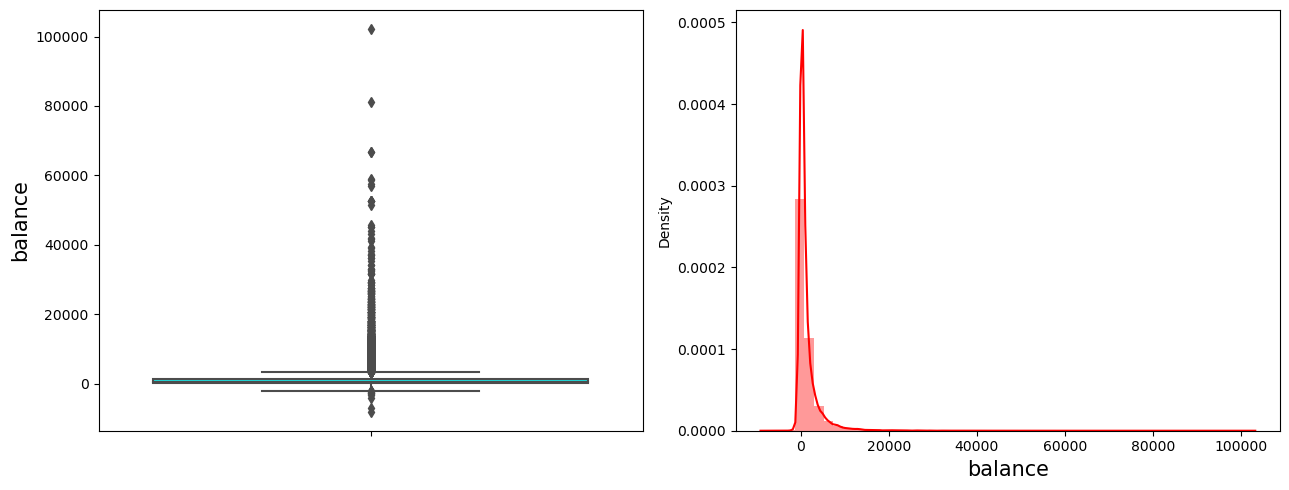

In [17]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(y='balance', data=df,color='cyan')
plt.ylabel('balance',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['balance'], color='r')
plt.xlabel('balance',fontsize=15)
plt.tight_layout()
plt.show()

In [18]:
# outliers are seen in balance but we can accept these outliers as there are rich and middle class both have accounts in bank 

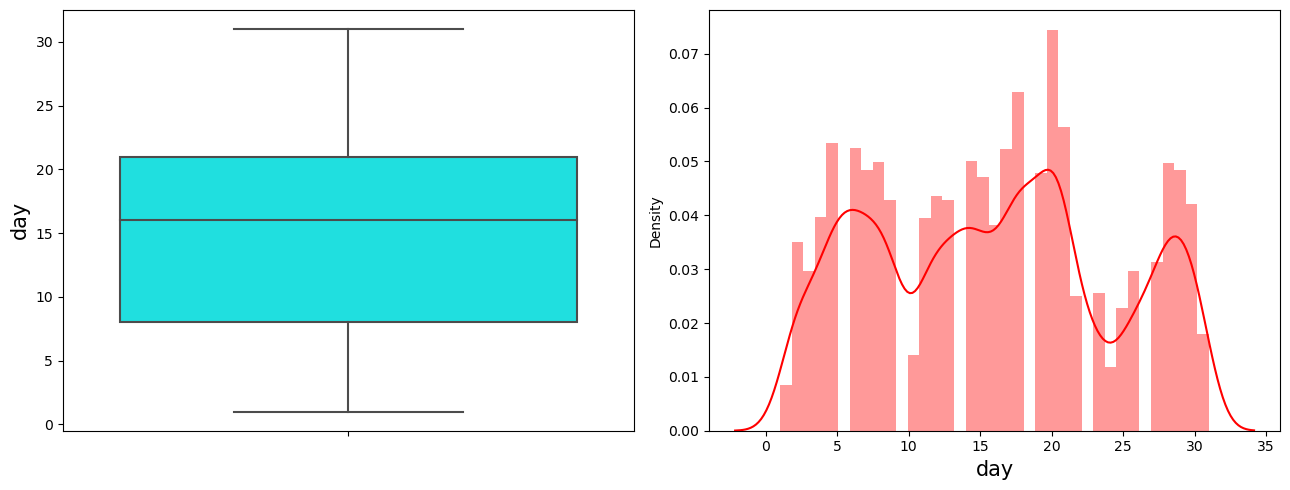

In [19]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(y='day', data=df,color='cyan')
plt.ylabel('day',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['day'], color='r')
plt.xlabel('day',fontsize=15)
plt.tight_layout()
plt.show()

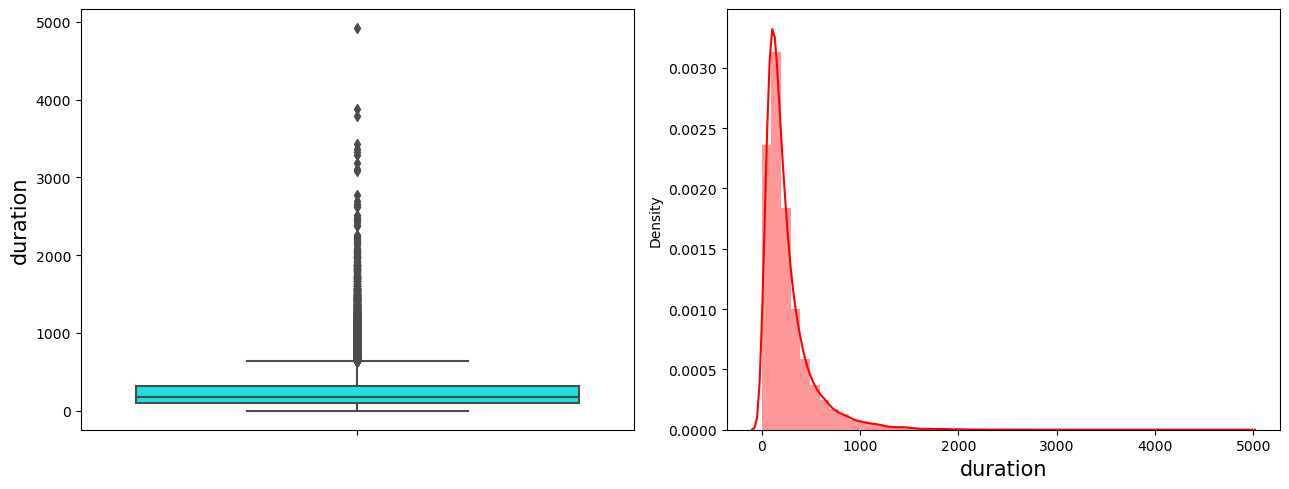

In [20]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(y='duration', data=df,color='cyan')
plt.ylabel('duration',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['duration'], color='r')
plt.xlabel('duration',fontsize=15)
plt.tight_layout()
plt.show()

In [21]:
# outliers are clearly seen and data is rightly skewed

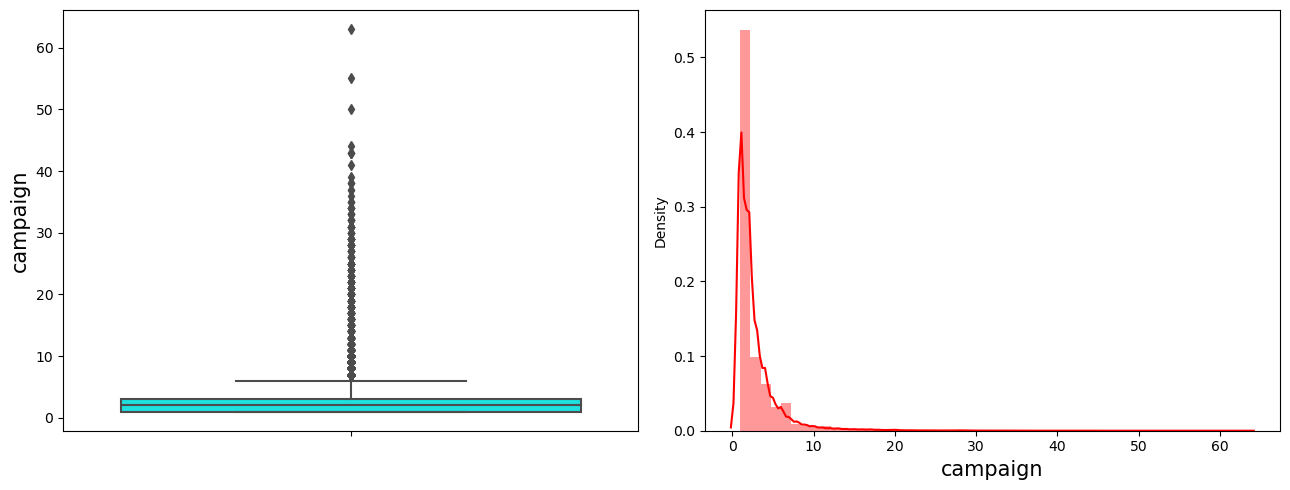

In [22]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(y='campaign', data=df,color='cyan')
plt.ylabel('campaign',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['campaign'], color='r')
plt.xlabel('campaign',fontsize=15)
plt.tight_layout()
plt.show()

In [23]:
# data is rightly skewed 

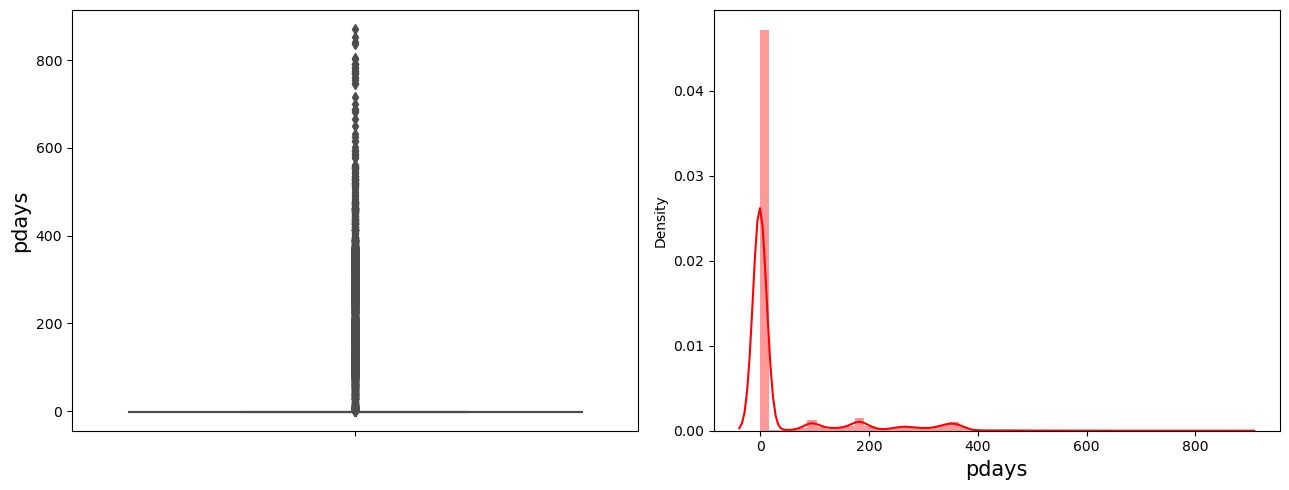

In [24]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(y='pdays', data=df,color='cyan')
plt.ylabel('pdays',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['pdays'], color='r')
plt.xlabel('pdays',fontsize=15)
plt.tight_layout()
plt.show()

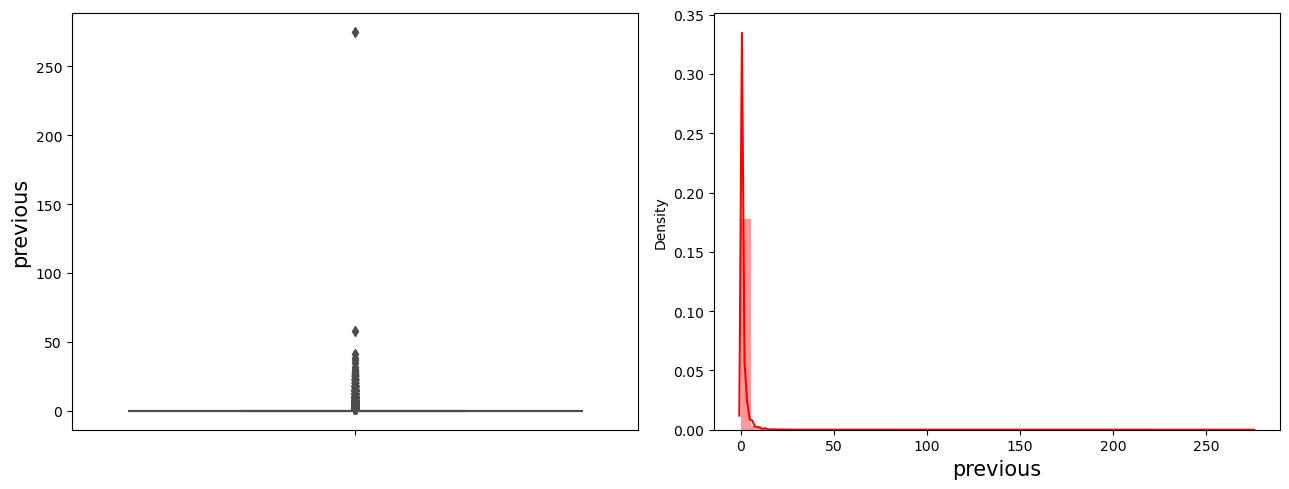

In [25]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(y='previous', data=df,color='cyan')
plt.ylabel('previous',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['previous'], color='r')
plt.xlabel('previous',fontsize=15)
plt.tight_layout()
plt.show()

In [26]:
# from all the visualization we have done it is clear that distribution is righly skewed which needs to be fixed 

In [27]:
# lets check if data is balanced or not 
df.subscribed.value_counts()

subscribed
no     27932
yes     3715
Name: count, dtype: int64

In [28]:
# as data is not balanced we will use SMOTE to balance the data 

In [29]:
!pip install -U imbalanced-learn

In [30]:
from imblearn.over_sampling import SMOTE # don't know what is happening can't import SMOTE otherwise we need to balance the target variable first 

In [31]:
# Now we need to convert categorical data in to numeric data as machine understand numeric values only 
df['loan'].replace(to_replace='no', value=1, inplace=True)
df['loan'].replace(to_replace='yes',  value=0, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,1,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,1,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,1,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,1,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,1,cellular,4,feb,380,1,-1,0,unknown,no


In [32]:
df['default'].replace(to_replace='no', value=1, inplace=True)
df['default'].replace(to_replace='yes',  value=0, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,1,1933,no,1,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,1,3,no,1,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,1,891,yes,1,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,1,3287,no,1,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,1,119,yes,1,cellular,4,feb,380,1,-1,0,unknown,no


In [33]:
df['housing'].replace(to_replace='no', value=1, inplace=True)
df['housing'].replace(to_replace='yes',  value=0, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,1,1933,1,1,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,1,3,1,1,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,1,891,0,1,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,1,3287,1,1,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,1,119,0,1,cellular,4,feb,380,1,-1,0,unknown,no


In [34]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,1,1933,1,1,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,1,3,1,1,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,1,891,0,1,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,1,3287,1,1,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,1,119,0,1,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,1,0,0,1,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,1,380,1,0,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,1,312,1,1,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,1,225,0,1,telephone,15,may,22,7,337,12,failure,no


In [35]:
df['job'].unique()

array(['admin.', 'unknown', 'services', 'management', 'technician',
       'retired', 'blue-collar', 'housemaid', 'self-employed', 'student',
       'entrepreneur', 'unemployed'], dtype=object)

In [36]:
from sklearn.preprocessing import OneHotEncoder
one_hot = pd.get_dummies(df['job'])
df = df.drop('job',axis = 1)
df = df.join(one_hot)
df = df.drop('unknown',axis = 1)
df.head()

,age,marital,education,default,balance,housing,loan,contact,day,month,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,56,married,unknown,1,1933,1,1,telephone,19,nov,...,False,False,False,False,False,False,False,False,False,False
1,31,married,secondary,1,3,1,1,cellular,20,jul,...,False,False,False,False,False,False,False,False,False,False
2,27,married,secondary,1,891,0,1,cellular,18,jul,...,False,False,False,False,False,False,True,False,False,False
3,57,divorced,tertiary,1,3287,1,1,cellular,22,jun,...,False,False,False,True,False,False,False,False,False,False
4,31,married,secondary,1,119,0,1,cellular,4,feb,...,False,False,False,False,False,False,False,False,True,False


In [37]:
one_hot = pd.get_dummies(df['education'])
df = df.drop('education',axis = 1)
df = df.join(one_hot)
df = df.drop('unknown',axis = 1)
df.head()

,age,marital,default,balance,housing,loan,contact,day,month,duration,...,management,retired,self-employed,services,student,technician,unemployed,primary,secondary,tertiary
0,56,married,1,1933,1,1,telephone,19,nov,44,...,False,False,False,False,False,False,False,False,False,False
1,31,married,1,3,1,1,cellular,20,jul,91,...,False,False,False,False,False,False,False,False,True,False
2,27,married,1,891,0,1,cellular,18,jul,240,...,False,False,False,True,False,False,False,False,True,False
3,57,divorced,1,3287,1,1,cellular,22,jun,867,...,True,False,False,False,False,False,False,False,False,True
4,31,married,1,119,0,1,cellular,4,feb,380,...,False,False,False,False,False,True,False,False,True,False


In [38]:
one_hot = pd.get_dummies(df['marital'])
df = df.drop('marital',axis = 1)
df = df.join(one_hot)
df = df.drop('divorced',axis = 1)

In [39]:
df

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,self-employed,services,student,technician,unemployed,primary,secondary,tertiary,married,single
0,56,1,1933,1,1,telephone,19,nov,44,2,...,False,False,False,False,False,False,False,False,True,False
1,31,1,3,1,1,cellular,20,jul,91,2,...,False,False,False,False,False,False,True,False,True,False
2,27,1,891,0,1,cellular,18,jul,240,1,...,False,True,False,False,False,False,True,False,True,False
3,57,1,3287,1,1,cellular,22,jun,867,1,...,False,False,False,False,False,False,False,True,False,False
4,31,1,119,0,1,cellular,4,feb,380,1,...,False,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,1,0,0,1,cellular,12,may,116,2,...,False,False,False,False,False,False,False,True,False,True
31643,53,1,380,1,0,cellular,5,jun,438,2,...,False,False,False,False,False,False,False,True,False,False
31644,32,1,312,1,1,cellular,7,aug,37,3,...,False,False,False,False,False,False,False,True,False,True
31645,57,1,225,0,1,telephone,15,may,22,7,...,False,False,False,True,False,False,True,False,True,False


In [40]:
one_hot = pd.get_dummies(df['contact'])
df = df.drop('contact',axis = 1)
df = df.join(one_hot)
df = df.drop('unknown',axis = 1)
df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,student,technician,unemployed,primary,secondary,tertiary,married,single,cellular,telephone
0,56,1,1933,1,1,19,nov,44,2,-1,...,False,False,False,False,False,False,True,False,False,True
1,31,1,3,1,1,20,jul,91,2,-1,...,False,False,False,False,True,False,True,False,True,False
2,27,1,891,0,1,18,jul,240,1,-1,...,False,False,False,False,True,False,True,False,True,False
3,57,1,3287,1,1,22,jun,867,1,84,...,False,False,False,False,False,True,False,False,True,False
4,31,1,119,0,1,4,feb,380,1,-1,...,False,True,False,False,True,False,True,False,True,False


In [41]:
one_hot = pd.get_dummies(df['month'])
df = df.drop('month',axis = 1)
df = df.join(one_hot)

In [42]:
df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,56,1,1933,1,1,19,44,2,-1,0,...,False,False,False,False,False,False,False,True,False,False
1,31,1,3,1,1,20,91,2,-1,0,...,False,False,False,True,False,False,False,False,False,False
2,27,1,891,0,1,18,240,1,-1,0,...,False,False,False,True,False,False,False,False,False,False
3,57,1,3287,1,1,22,867,1,84,3,...,False,False,False,False,True,False,False,False,False,False
4,31,1,119,0,1,4,380,1,-1,0,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,1,0,0,1,12,116,2,-1,0,...,False,False,False,False,False,False,True,False,False,False
31643,53,1,380,1,0,5,438,2,-1,0,...,False,False,False,False,True,False,False,False,False,False
31644,32,1,312,1,1,7,37,3,-1,0,...,False,False,False,False,False,False,False,False,False,False
31645,57,1,225,0,1,15,22,7,337,12,...,False,False,False,False,False,False,True,False,False,False


In [43]:
one_hot = pd.get_dummies(df['poutcome'])
df = df.drop('poutcome',axis = 1)
df = df.join(one_hot)
df = df.drop('other',axis = 1)
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
0,56,1,1933,1,1,19,44,2,-1,0,...,False,False,False,False,True,False,False,False,False,True
1,31,1,3,1,1,20,91,2,-1,0,...,True,False,False,False,False,False,False,False,False,True
2,27,1,891,0,1,18,240,1,-1,0,...,True,False,False,False,False,False,False,False,False,True
3,57,1,3287,1,1,22,867,1,84,3,...,False,True,False,False,False,False,False,False,True,False
4,31,1,119,0,1,4,380,1,-1,0,...,False,False,False,False,False,False,False,False,False,True


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31647 non-null  int64 
 1   default        31647 non-null  int64 
 2   balance        31647 non-null  int64 
 3   housing        31647 non-null  int64 
 4   loan           31647 non-null  int64 
 5   day            31647 non-null  int64 
 6   duration       31647 non-null  int64 
 7   campaign       31647 non-null  int64 
 8   pdays          31647 non-null  int64 
 9   previous       31647 non-null  int64 
 10  subscribed     31647 non-null  object
 11  admin.         31647 non-null  bool  
 12  blue-collar    31647 non-null  bool  
 13  entrepreneur   31647 non-null  bool  
 14  housemaid      31647 non-null  bool  
 15  management     31647 non-null  bool  
 16  retired        31647 non-null  bool  
 17  self-employed  31647 non-null  bool  
 18  services       31647 non-n

In [45]:
df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
0,56,1,1933,1,1,19,44,2,-1,0,...,False,False,False,False,True,False,False,False,False,True
1,31,1,3,1,1,20,91,2,-1,0,...,True,False,False,False,False,False,False,False,False,True
2,27,1,891,0,1,18,240,1,-1,0,...,True,False,False,False,False,False,False,False,False,True
3,57,1,3287,1,1,22,867,1,84,3,...,False,True,False,False,False,False,False,False,True,False
4,31,1,119,0,1,4,380,1,-1,0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,1,0,0,1,12,116,2,-1,0,...,False,False,False,True,False,False,False,False,False,True
31643,53,1,380,1,0,5,438,2,-1,0,...,False,True,False,False,False,False,False,False,False,True
31644,32,1,312,1,1,7,37,3,-1,0,...,False,False,False,False,False,False,False,False,False,True
31645,57,1,225,0,1,15,22,7,337,12,...,False,False,False,True,False,False,False,True,False,False


In [46]:
x = df.drop(columns = ['subscribed'])
y = df['subscribed']

In [47]:
y

0         no
1         no
2         no
3        yes
4         no
        ... 
31642     no
31643    yes
31644     no
31645     no
31646    yes
Name: subscribed, Length: 31647, dtype: object

In [48]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            31647 non-null  int64
 1   default        31647 non-null  int64
 2   balance        31647 non-null  int64
 3   housing        31647 non-null  int64
 4   loan           31647 non-null  int64
 5   day            31647 non-null  int64
 6   duration       31647 non-null  int64
 7   campaign       31647 non-null  int64
 8   pdays          31647 non-null  int64
 9   previous       31647 non-null  int64
 10  admin.         31647 non-null  bool 
 11  blue-collar    31647 non-null  bool 
 12  entrepreneur   31647 non-null  bool 
 13  housemaid      31647 non-null  bool 
 14  management     31647 non-null  bool 
 15  retired        31647 non-null  bool 
 16  self-employed  31647 non-null  bool 
 17  services       31647 non-null  bool 
 18  student        31647 non-null  bool 
 19  tech

In [49]:
x = x.apply(pd.to_numeric)

In [50]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            31647 non-null  int64
 1   default        31647 non-null  int64
 2   balance        31647 non-null  int64
 3   housing        31647 non-null  int64
 4   loan           31647 non-null  int64
 5   day            31647 non-null  int64
 6   duration       31647 non-null  int64
 7   campaign       31647 non-null  int64
 8   pdays          31647 non-null  int64
 9   previous       31647 non-null  int64
 10  admin.         31647 non-null  bool 
 11  blue-collar    31647 non-null  bool 
 12  entrepreneur   31647 non-null  bool 
 13  housemaid      31647 non-null  bool 
 14  management     31647 non-null  bool 
 15  retired        31647 non-null  bool 
 16  self-employed  31647 non-null  bool 
 17  services       31647 non-null  bool 
 18  student        31647 non-null  bool 
 19  tech

In [51]:
x = x.drop(columns = ['unknown'])

In [52]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            31647 non-null  int64
 1   default        31647 non-null  int64
 2   balance        31647 non-null  int64
 3   housing        31647 non-null  int64
 4   loan           31647 non-null  int64
 5   day            31647 non-null  int64
 6   duration       31647 non-null  int64
 7   campaign       31647 non-null  int64
 8   pdays          31647 non-null  int64
 9   previous       31647 non-null  int64
 10  admin.         31647 non-null  bool 
 11  blue-collar    31647 non-null  bool 
 12  entrepreneur   31647 non-null  bool 
 13  housemaid      31647 non-null  bool 
 14  management     31647 non-null  bool 
 15  retired        31647 non-null  bool 
 16  self-employed  31647 non-null  bool 
 17  services       31647 non-null  bool 
 18  student        31647 non-null  bool 
 19  tech

In [53]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled = scaler.fit_transform(x)

In [54]:
x_scaled

array([[ 1.41579295,  0.13723448,  0.18793314, ..., -0.1145664 ,
        -0.34476309, -0.1868848 ],
       [-0.93715562,  0.13723448, -0.4493973 , ..., -0.1145664 ,
        -0.34476309, -0.1868848 ],
       [-1.31362739,  0.13723448, -0.15615925, ..., -0.1145664 ,
        -0.34476309, -0.1868848 ],
       ...,
       [-0.84303767,  0.13723448, -0.34735838, ..., -0.1145664 ,
        -0.34476309, -0.1868848 ],
       [ 1.5099109 ,  0.13723448, -0.37608778, ..., -0.1145664 ,
         2.90054252, -0.1868848 ],
       [ 1.32167501,  0.13723448, -0.38302247, ..., -0.1145664 ,
        -0.34476309, -0.1868848 ]])

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures



In [57]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30, random_state=3)

In [59]:
# KNN 
knn = KNeighborsClassifier(n_neighbors=1)
accuracy_rate=[]
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x_train,y_train,cv=10)
    accuracy_rate.append(score.mean())
print(accuracy_rate)

[0.8712076545704948, 0.8870524239880695, 0.8909349406328693, 0.8920185435698512, 0.8930117104416067, 0.893102085387618, 0.8925150353269065, 0.8935533081793808, 0.8933276152912126, 0.893823964436766, 0.8938240663021244, 0.8938691722828433, 0.893507998467945, 0.893553287806309, 0.892876188768733, 0.8930566941838954, 0.8936886261215375, 0.8935532063140224, 0.8934177661334355, 0.8935984141600996]


Text(0, 0.5, 'Accuracy rate')

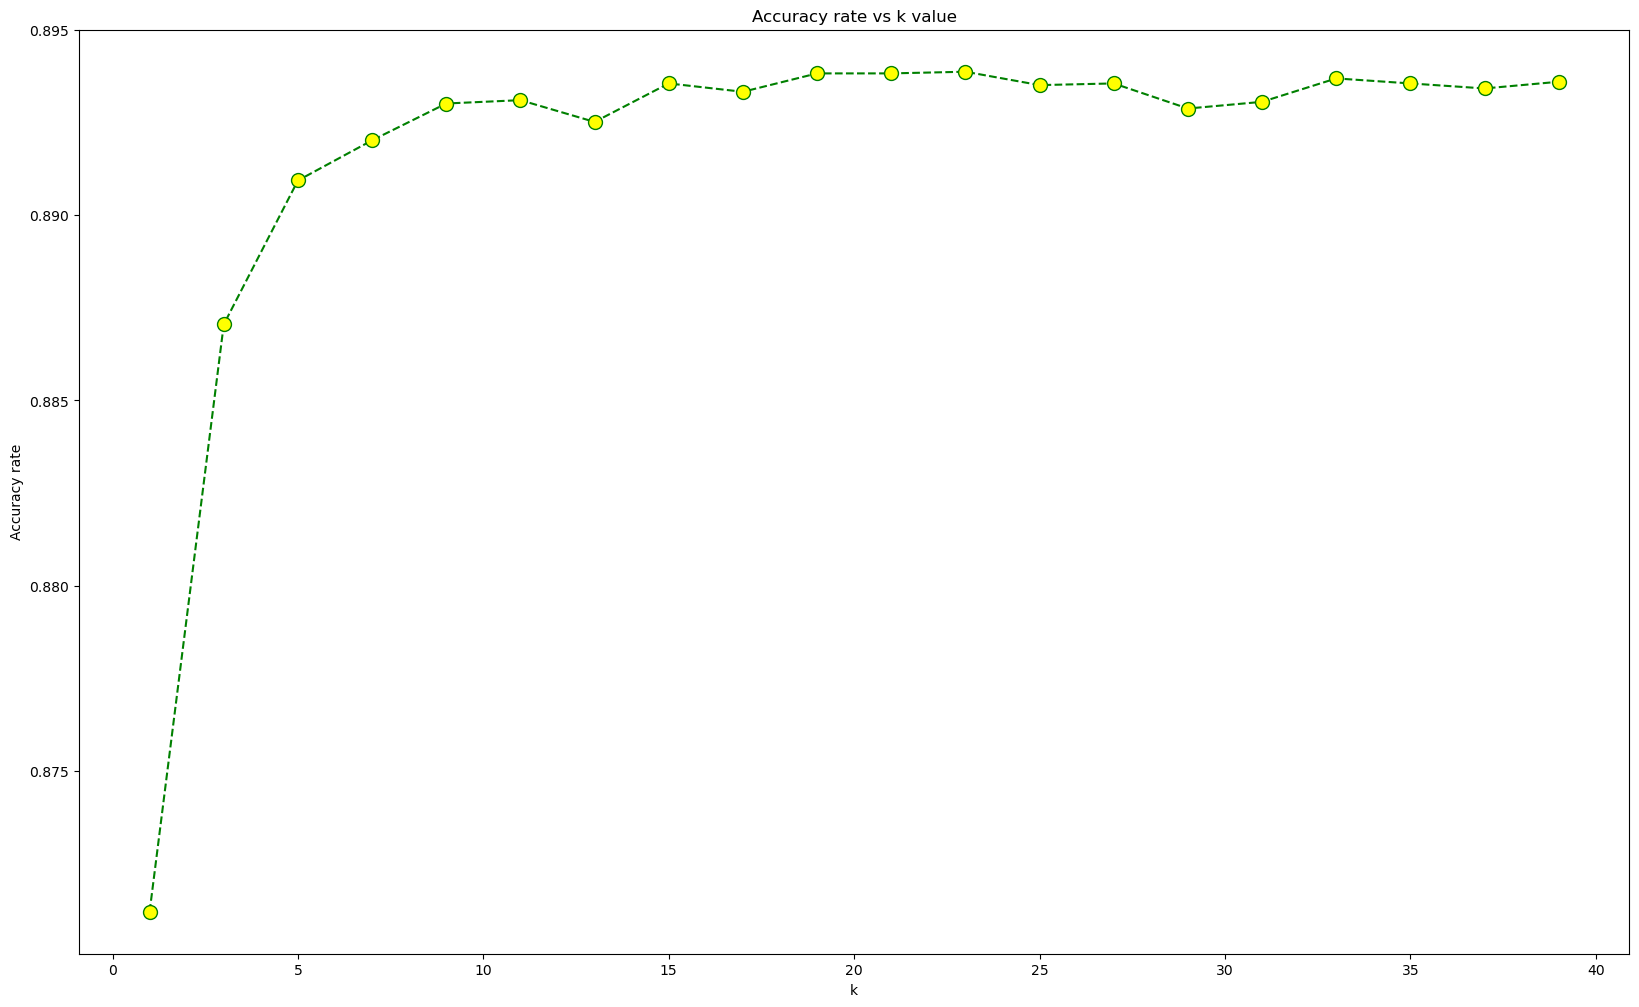

In [60]:
# plotting accuracy of knn for every value f k 
plt.figure(figsize=(20,12))
plt.plot(range(1,40,2),accuracy_rate,color='green',linestyle='dashed',marker='o',markerfacecolor='yellow',markersize=10)
plt.title('Accuracy rate vs k value')
plt.xlabel('k')
plt.ylabel('Accuracy rate')

In [65]:
# again training for best value of k which is 23
knn = KNeighborsClassifier(n_neighbors=23)
accuracy_rate=[]
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x_train,y_train,cv=10)
    accuracy_rate.append(score.mean())
print(accuracy_rate)

[0.8712076545704948, 0.8870524239880695, 0.8909349406328693, 0.8920185435698512, 0.8930117104416067, 0.893102085387618, 0.8925150353269065, 0.8935533081793808, 0.8933276152912126, 0.893823964436766, 0.8938240663021244, 0.8938691722828433, 0.893507998467945, 0.893553287806309, 0.892876188768733, 0.8930566941838954, 0.8936886261215375, 0.8935532063140224, 0.8934177661334355, 0.8935984141600996]


In [67]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 10000]
    }
]
logModel = LogisticRegression()

In [68]:
clf = GridSearchCV(logModel, param_grid = param_grid,scoring='accuracy', cv = 5 )
best_clf = clf.fit(x_train,y_train)

In [69]:
pred = best_clf.predict(x_test)
accLR = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(x_test)
aucScoreLR = roc_auc_score(y_test,  y_pred_prob[:,1])
fprLR, tprLR, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for LR is ",aucScoreLR)
print("Test Accuracy score for LR is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for LR is ",accuracy_score(y_train, predT))
print("Best parameters for accuracy of LR are ",best_clf.best_params_)

ValueError: y_true takes value in {'no', 'yes'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.